# Developing and Enhancing an Artificial Neural Network for Regression

## 1. Build and TDataset Setup and Preprocessing:

### 1.1 Installing and Importing Python libraries (numpy, pandas, tensorflow, and matplotlib):

In [1]:
# %pip install numpy
# %pip install pandas
# %pip install tensorflow
# %pip install sklearn
# %pip install matplotlib
# %pip install seaborn

In [2]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd
# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-02-03 12:44:51.060781: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 12:44:51.222652: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 12:44:51.355497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738579491.495283     948 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738579491.536674     948 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 12:44:51.838314: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### 1.2 Loading the Data:

In [3]:
data = pd.read_csv('HousingData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


There are 14 attributes in each case of the dataset. They are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Early Insights:**
- We have 506 rows with 14 columns with numerical values.
- there are a missing data in 6 columns, we need to handle it later.
- there is an indication of outliers in many columns, we need to handle it later also.

### 1.3 Dealing with missing values and outliers:

In [6]:
print("Number of missing values for each column:")
data.isna().sum()

Number of missing values for each column:


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
print("Number of rows with at least one missing value:")
data.isna().any(axis=1).sum()

Number of rows with at least one missing value:


np.int64(112)

In [8]:
print("Percentage of rows with at least one missing value:")
data.isna().any(axis=1).sum()*100/data.shape[0]

Percentage of rows with at least one missing value:


np.float64(22.134387351778656)

We have about 22% of rows on the dataset have missing values, so we cannot simply drop them, so we will simply impute them now, and maybe later trying to use a more sophisticated approach.

#### 1.3.1 Imputing missing values:

I will use median for imputation because we have outliers and they can influnce the mean values.

#### 1.3.2 Wait, We need to split the data before imputing:

**Imputing the Data before splitting may produce data leakage for our analysis**

In [9]:
X = data.drop(columns='MEDV')
y = data['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Okay now we can impute our data.

In [11]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)

In [12]:
X_train.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [13]:
X_test.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### 1.3.2 Dealing with Outliers:

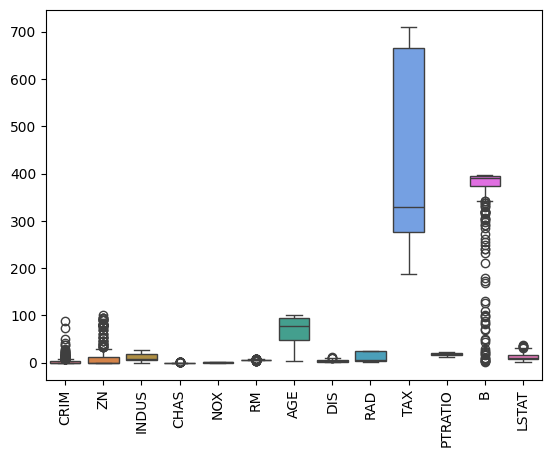

In [14]:
sns.boxplot(X_train)
plt.xticks(rotation=90)
plt.show()

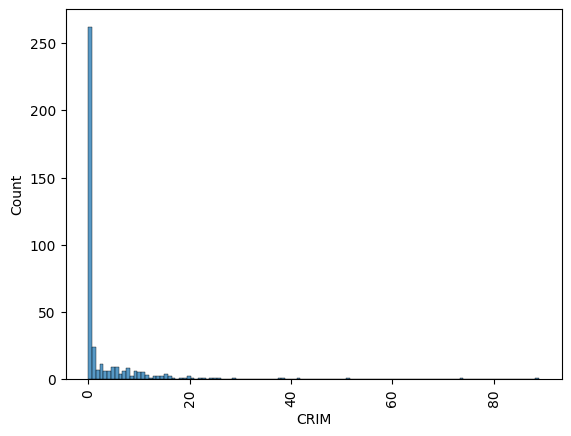

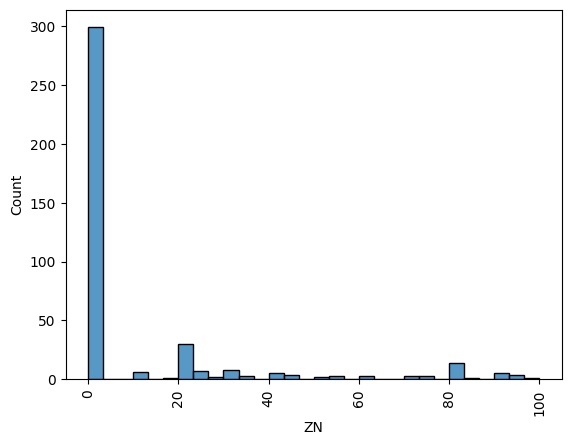

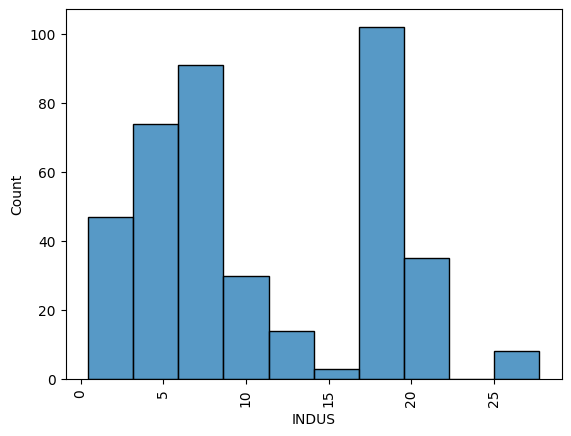

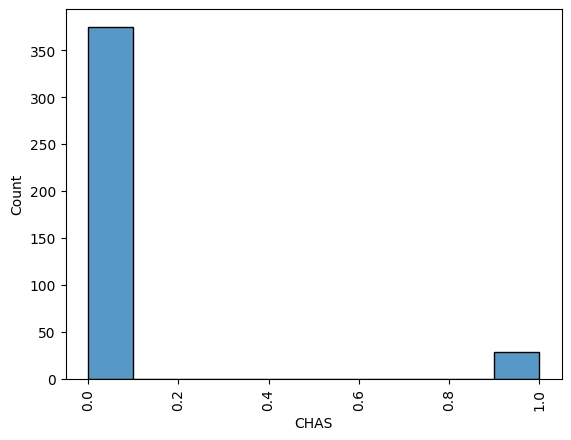

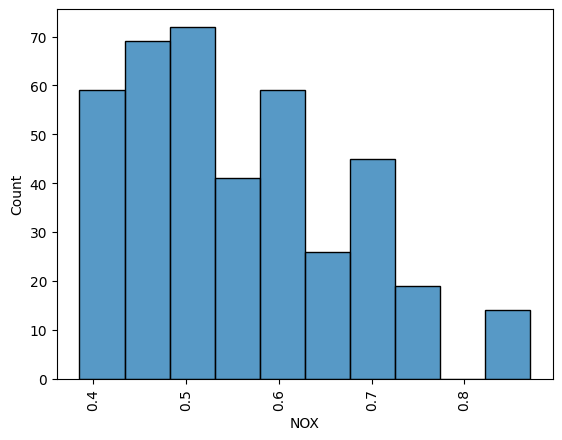

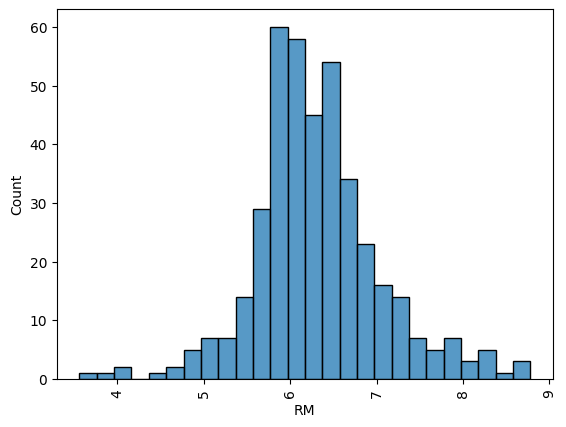

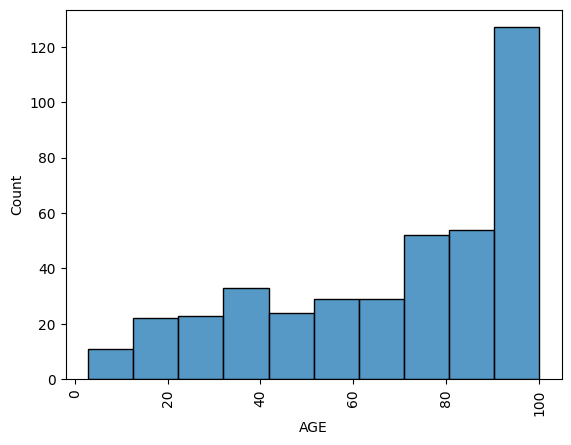

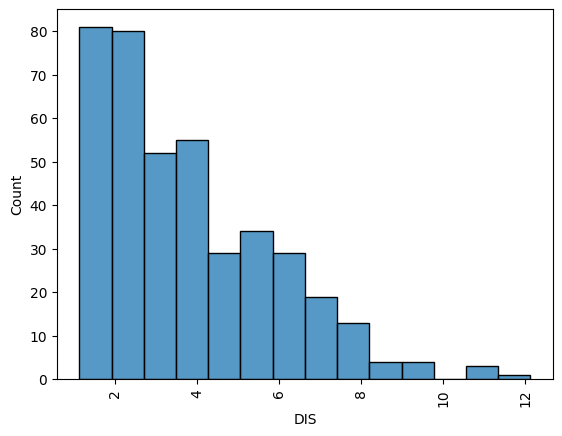

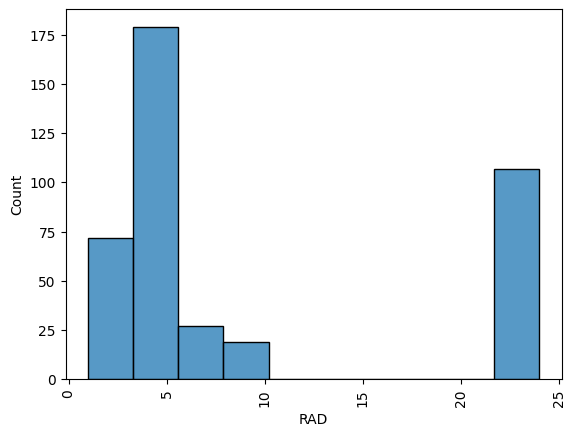

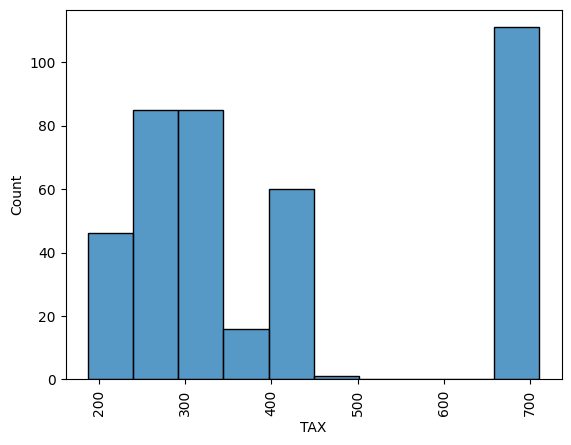

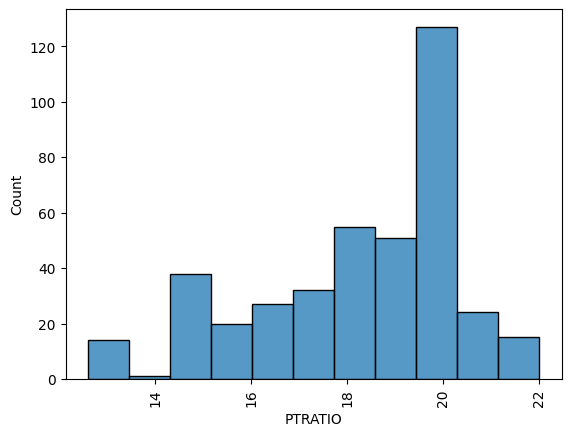

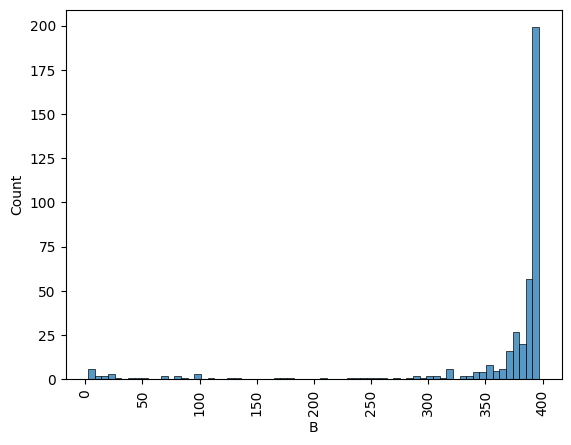

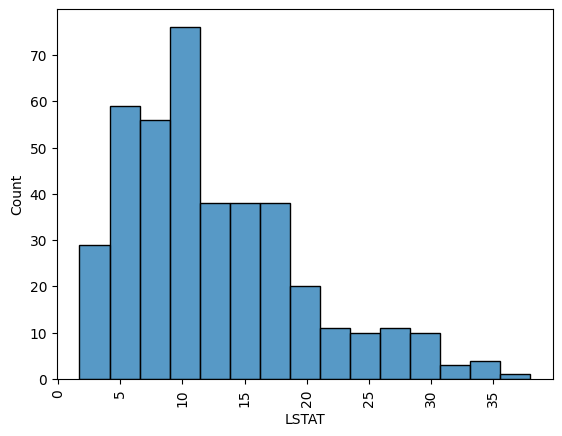

In [15]:
for col in X_train.columns:
    sns.histplot(X_train[col])
    plt.xticks(rotation=90)
    plt.show()

Based on Boxplot and histogram we need to deal with CRIM and B columns, beacuse their distrbution are very skewd.

**I will use capping for now, and maybe later we will apply more sophisticated approach.**

In [16]:
first_q = X_train[['CRIM', 'B']].quantile(0.25)
third_q = X_train[['CRIM', 'B']].quantile(0.75)
IQR = third_q-first_q
upper_bound = third_q + ( IQR * 1.5 )
lower_bound = first_q - ( IQR * 1.5 )
display('Lower Bound:', lower_bound)
display('Upper Bound:', upper_bound)

'Lower Bound:'

CRIM     -4.067902
B       341.676250
dtype: float64

'Upper Bound:'

CRIM      6.992398
B       428.506250
dtype: float64

In [17]:
X_train.loc[X_train['CRIM']<lower_bound['CRIM'], 'CRIM'] = lower_bound['CRIM']

In [18]:
X_train.loc[X_train['CRIM']>upper_bound['CRIM'], 'CRIM'] = upper_bound['CRIM']

In [19]:
X_train.loc[X_train['B']<lower_bound['B'], 'B'] = lower_bound['B']

In [20]:
X_train.loc[X_train['B']>upper_bound['B'], 'B'] = upper_bound['B']

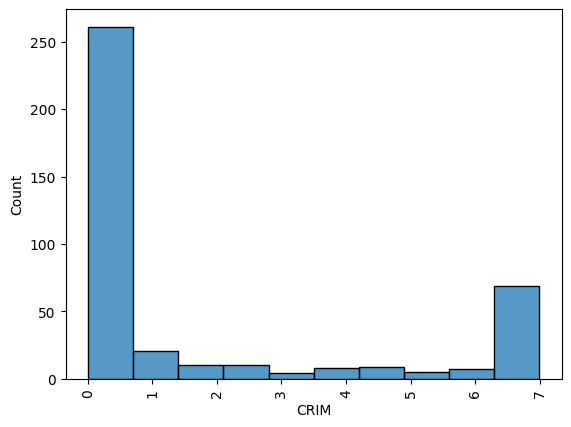

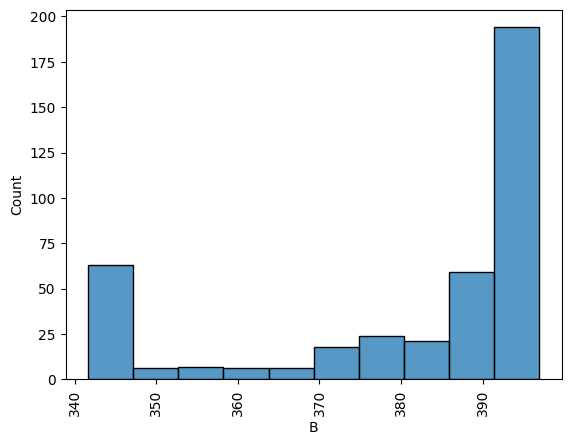

In [21]:
for col in ['CRIM', 'B']:
    sns.histplot(X_train[col])
    plt.xticks(rotation=90)
    plt.show()

Okay now its better, let us apply it on test data.

In [22]:
X_test.loc[X_test['CRIM']<lower_bound['CRIM'], 'CRIM'] = lower_bound['CRIM']
X_test.loc[X_test['CRIM']>upper_bound['CRIM'], 'CRIM'] = upper_bound['CRIM']
X_test.loc[X_test['B']<lower_bound['B'], 'B'] = lower_bound['B']
X_test.loc[X_test['B']>upper_bound['B'], 'B'] = upper_bound['B']

### 1.4 Normalizing values:

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train[0]

array([ 1.94617893, -0.48335755,  1.06075706, -0.27808871,  1.54943138,
       -0.66621493,  0.84987131, -0.9235442 ,  1.64443521,  1.51877181,
        0.84960845,  0.52084542, -0.26328072])

Now our values in the same range, and that's good for training the neural network.

## 2. ANN Construction:

In [25]:
def build_model(n_features):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(n_features,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')  # Regression output
    ])
    return model

## 3. Training Workflow:

Epoch 1/70


/home/ay7/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 615.9838 - val_loss: 500.6078
Epoch 2/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 554.8466 - val_loss: 474.2108
Epoch 3/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 540.9944 - val_loss: 447.2641
Epoch 4/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 500.9351 - val_loss: 419.1101
Epoch 5/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 469.2270 - val_loss: 388.6459
Epoch 6/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 416.7049 - val_loss: 355.0527
Epoch 7/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 403.6239 - val_loss: 318.5448
Epoch 8/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 360.2791 - val_loss: 280.4827
Epoch 9/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 297.1013 - val_loss: 241.8834
Epoch 10/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 261.5978 - val_loss: 203.9565
Epoch 11/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 198.2917 - val_loss: 168.7387
Epoch 12/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - 

/home/ay7/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 442.9946 - val_loss: 632.8412
Epoch 2/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 698.3759 - val_loss: 211.0518
Epoch 3/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 253.7560 - val_loss: 304.2331
Epoch 4/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 284.3655 - val_loss: 83.7551
Epoch 5/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 99.5274 - val_loss: 64.7106
Epoch 6/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 67.8338 - val_loss: 201.9224
Epoch 7/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 168.2965 - val_loss: 45.8131
Epoch 8/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55.1718 - val_loss: 84.9025
Epoch 9/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 79.1321 - val_loss: 43.7545
Epoch 10/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 47.7590 - val_loss: 32.5151
Epoch 11/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31.3960 - val_loss: 37.9692
Epoch 12/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 39.1264

/home/ay7/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 588.8945 - val_loss: 456.9088
Epoch 2/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 520.6780 - val_loss: 424.5497
Epoch 3/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 484.3306 - val_loss: 392.8616
Epoch 4/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 462.4095 - val_loss: 359.8850
Epoch 5/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 433.3918 - val_loss: 325.6855
Epoch 6/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 386.9070 - val_loss: 290.6909
Epoch 7/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 338.1196 - val_loss: 254.9453
Epoch 8/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 297.1770 - val_loss: 222.4552
Epoch 9/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 238.0337 - val_loss: 188.8899
Epoch 10/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 201.9866 - val_loss: 160.4233
Epoch 11/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 176.7144 - val_loss: 133.8382
Epoch 12/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

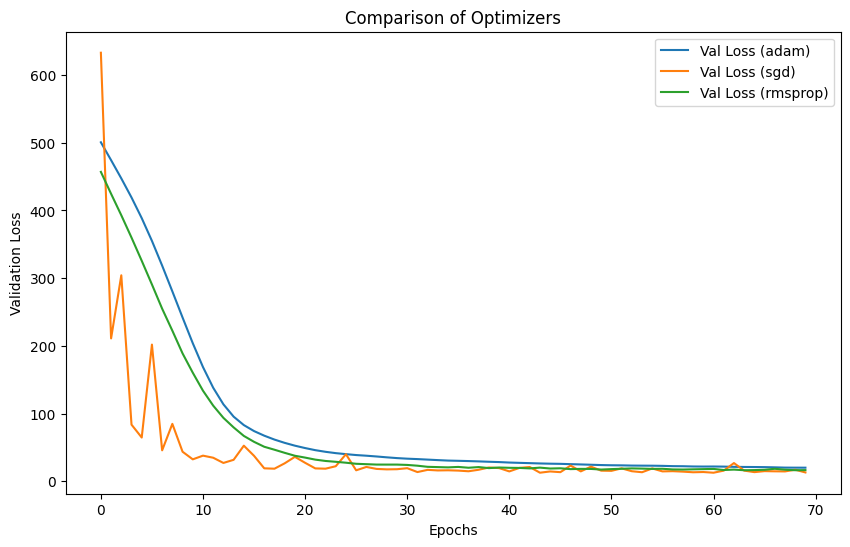

In [32]:
optimizers = ['adam', 'sgd', 'rmsprop']
results = {}

plt.figure(figsize=(10, 6))

for opt in optimizers:
    model = build_model(X_train.shape[1])
    model.compile(optimizer=opt, loss='mse')
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=70,
        batch_size=64,
        verbose=1
    )
    
    results[opt] = history.history
    plt.plot(history.history['val_loss'], label=f'Val Loss ({opt})')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Comparison of Optimizers')
plt.legend()
plt.show()


#### Insights:

- SGD give us the smallest loss mostly but it's not smooth have a lot of variance.
- rmsprop and adam are very close but rmsprop show a slightly better results.